# Setup

Getting default setup from Previous Chapters:
- Making sure it works both in Python 2 & 3,
- Getting common imports
- Inline plotting for Jupyter
- Save Figure Function Setup

In [1]:
# python 2 & 3 support
from __future__ import division, print_function, unicode_literals

# common imports
import numpy as np
import os

# setting random seed
np.random.seed(42)

# matplotlib inline plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# plotting setups
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


# save figure function
PROJECT_ROOT_DIR = 'figures'
CHAPTER_ID = 'svm'
FIG_PATH = os.path.join(PROJECT_ROOT_DIR, CHAPTER_ID)

def save_fig(fig_id, tight_layout = True):
    if not os.path.isdir(FIG_PATH):
        os.makedirs(FIG_PATH)
    fig_path = os.path.join(FIG_PATH, fig_id + '.png') # save as png file
    print('Saving figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(fig_path, format = 'png', dpi = 300)


# Intro

_Support Vector Machine_ (SVM) is a very powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression and even outlier detection. It is one of the most popular models in Machine Learning. __SVMs are particularly well suited for classification of complex but small- or medium-sized datasets__.

# SVM Classification

## Linear SVM Classification

### Hard Margin Classification

We'll use Iris dataset to illustrate Linear SVM Classifier

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:, (2,3)] # petal length, petal width
y = iris['target']

setosa_or_versicolor = (y==0) | (y==1)
X = X[setosa_or_versicolor]
y= y[setosa_or_versicolor]

svm_clf = SVC(kernel = 'linear', C = float('inf'))
svm_clf.fit(X,y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

The fundamental of Linear SVM Classifier is that two classes can clearly be separated easily with a straight line (i.e., they are _linearly separable_). See illustration below:

Saving figure large_margin_classification_plot


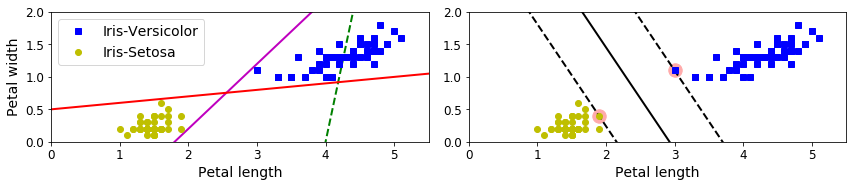

In [3]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig('large_margin_classification_plot')

The classifier `pred_1`, `pred_2`, `pred_3` shows decision boundaries of three possible linear classifiers. The dashed model (`pred_1`) performs so bad that it cannot separate Versicolor from Setosa. `pred_1` & `pred_2` works perfectly on the training set but their decision boundaries come too close -- they might not perform well on new instances. On the other hand, the `svc` classifier not only separates Versicolor well with Setosa on the training data, but also stays far away from the closest training instances as possible. <br>

We can think of an SVM classifier as fitting the widest possible street (represented by the parallel dashed lines on the right) between the classes. This is called _large margin classification_.

__Note__: <br>
SVMs are sensitve to feature scales, we can see illustrations down below:

Saving figure sensitivity_to_feature_scales_plot


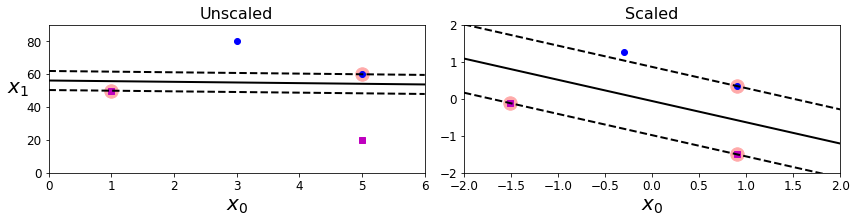

In [4]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

# same data, processing with scaler before
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig("sensitivity_to_feature_scales_plot")


If we strictly impose that all instances be off the street and on the right side, this is called _hard margin classification_. 

### Soft Margin Classification

There are two main issues with hard margin classification:
1. It only works if the data is linearly separable
2. It is very sensitive to outliers

See illustrations below:

Saving figure sensitivity_to_outliers


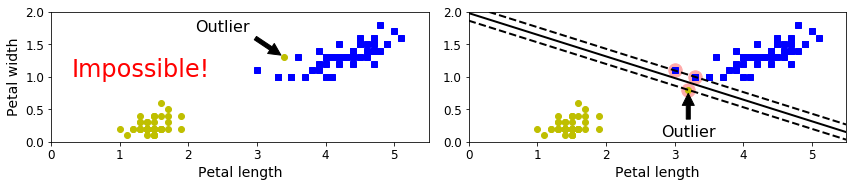

In [5]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])
save_fig('sensitivity_to_outliers')

To avoid these issues it is preferable to use a more flexible model. The objective is to find a good balance between keeping the street as large as possible and limiting the _margin violations_ (i.e., instances that end up in the middle of the street or even on the wrong side). This is called _Soft Margin Classification_.

See illustration below:

Loading Iris Dataset for Virginica Only

In [6]:
iris = datasets.load_iris()
X = iris['data'][:,(2,3)]  # petal length, petal width
y = (iris['target'] ==2).astype(np.float64) # Iris-Virginica

We start by building out 2 SVM classifiers (with one `C=1` and the other `C=100`)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
# building a pipeline first
scaler = StandardScaler()
svm_clf1 = LinearSVC(C = 1, loss = 'hinge', random_state = 42)
svm_clf2 = LinearSVC(C =100, loss = 'hinge', random_state =42)

scaled_svm_clf1 = Pipeline([
    ('scaler', scaler),
    ('linear_svc', svm_clf1),
])

scaled_svm_clf2 = Pipeline([
    ('scaler',scaler),
    ('linear_svc',svm_clf2),
])

scaled_svm_clf1.fit(X,y)
scaled_svm_clf2.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

Now we want to covert the decision boundary (function) back to normal scale and find support vectors

In [8]:
# convert back to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_/scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_/scaler.scale_])

w1 = svm_clf1.coef_[0]/scaler.scale_
w2 = svm_clf2.coef_[0]/scaler.scale_

svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])


# Find Support Vectors
t = y*2 -1
support_vectors_idx1 = (t*(X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t*(X.dot(w2) + b2) <1 ).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

Saving figure regularization_plot


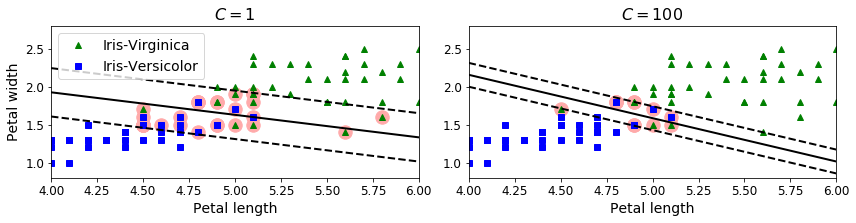

In [9]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

save_fig("regularization_plot")

We can see from above with `C=1` there are more margin violations than with `C=100`. So __a smaller `C` leads to a wider street but more margin violations__.

__Note__: <br>
If a SVM model is overfitting, we can try regularizing it by reducing `C`.

__Note__: <br>
Unlike Logistic Regression classifiers, SVM classifiers do not output probabilities for each class.

See implementation of Linear SVM in Scikit-Learn below:

In [10]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C = 1, loss = 'hinge', random_state = 42)),
])

svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

We can make predictions using `.predict()`

In [11]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

Alternatively, we could use `SVC` class, using `SVC(kernel = 'linear', C = 1)`. However, it is much slower, especially with large training sets, therefore is not recommended. <br>
Another option is to use `SGDClassifer`, weith `SGDClassifier(loss = 'hinge', alpha = 1/(m*C))`. This applies regular Stochastic Gradient Descent to train a linear SVM classifier. It does not converge as fast as the `LinearSVC(loss = 'hinge')` class, but can be useful to handle huge datasets that do not fit in memory, or to handle online classification tasks. 

__Note__: <br>
The `LinearSVC` class regularizes the bias term, so we should center the training set first by subtracting its mean. This is automatic if you scale the data using `StandardScaler`. Moreover, make sure you set `loss = 'hinge'`, as it is not the default value. Finally, for better performance you should set `dual = False` unless there are more features than training instances.

## Nonlinear SVM Classification

In real life scenarios, many datasets are not even close to being linearly separable. One approach to handling nonlinear datasets is to add more features， such as polynomial features; in some cases this can result in a linearly separable dataset.

See illustration below for adding polynomial features:

Saving figure higher_dimensions_plot


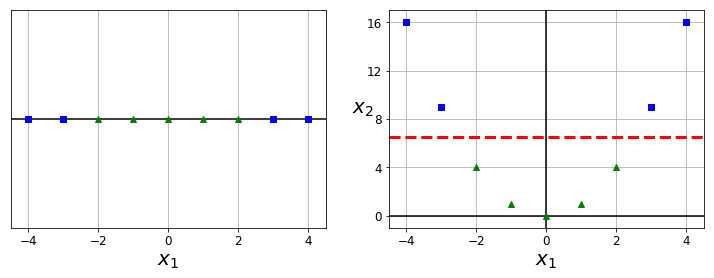

In [12]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig("higher_dimensions_plot", tight_layout=False)

We can implement this in Scikit-Learn in the following way using `PolynomialFeatures` transformer:

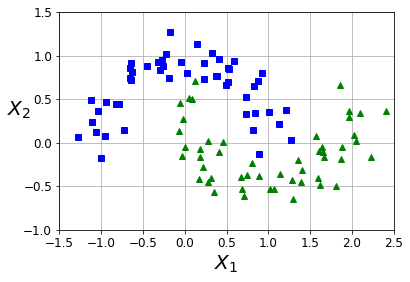

In [13]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 100, noise = 0.15, random_state = 42)


def plot_dataset(X,y, axes):
    plt.plot(X[:,0][y==0], X[:,1][y==0], 'bs')
    plt.plot(X[:,0][y==1], X[:,1][y==1], 'g^')
    plt.axis(axes)
    plt.grid(True, which = 'both')
    plt.xlabel(r'$X_1$', fontsize = 20)
    plt.ylabel(r'$X_2$', fontsize = 20, rotation =0)
    
    
plot_dataset(X,y, [-1.5, 2.5, -1, 1.5])

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC( C = 10, loss = 'hinge', random_state = 42)),
])

polynomial_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

Now we need to visualize the decision boundary

Saving figure moons_polynomial_svc_plot


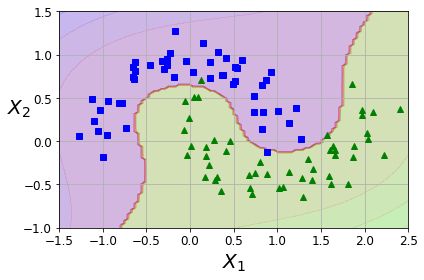

In [15]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    
    
    plt.contourf(x0, x1, y_pred, cmap = plt.cm.brg, alpha = 0.2)
    plt.contourf(x0, x1, y_decision, cmap = plt.cm.brg, alpha = 0.1)
    

plot_predictions(polynomial_svm_clf, [-1.5,2.5,-1,1.5])
plot_dataset(X,y, [-1.5,2.5,-1,1.5])

save_fig('moons_polynomial_svc_plot')

### Polynomial Kernel

Adding polynomial features is simple to implement and can work great with all sorts of Machine Learning algorithms, but at a low polynomial degree it cannot deal with very complex datasets, and with a high polynomial degree it creates a huge number of features, making the model too slow.

When using SVMs, we can use a technique called _kernel trick_. It makes it possible to get the same result as if we added many polynomial features, even with very high degree polynomials, without actually having to add them. So there is no combinatorial explosion of the number of features since we don't actually add any features. This can be implemented by `SVC` class:

In [16]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'poly', degree = 3, coef0 = 1, C =5)),
])

poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [17]:
poly100_kernel_svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('svm_clf', SVC(kernel = 'poly', degree = 10, coef0 = 100, C = 5))
])

poly100_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

Visualizing both _kernel trick_ results:

Saving figure moons_kernelized_polynomial_svc_plot


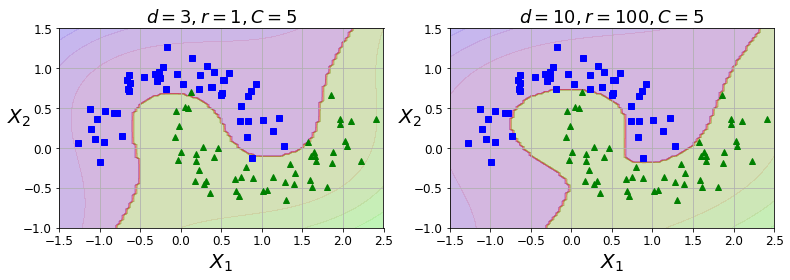

In [18]:
plt.figure(figsize = (11,4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r'$d=3, r=1, C=5$', fontsize = 18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.title(r'$d=10, r=100, C=5$', fontsize = 18)

save_fig('moons_kernelized_polynomial_svc_plot')

We can reduce polynomial degree if our model is overfitting. Conversely, if it is underfitting, we can try increasing it. The hyperparameter `coef0` controls how much the model is influenced by high-degree polynomials versus low-degress polynomials.

__Note__: <br>
A common approach to find the right hyerparameter values is to use grid search. It's oftern faster to first do a very coarse grid search, then a finer grid search around the best values found.

### Adding Similarity Features

Another technique to tackle nonlinear problems is to add features computed using a _similarity function_ that measures how much each instance resembles a particular _landmark_. <br>
E.g., We'll use the one-dimensional dataset discussed earlier and add two landmarks to it at $x_1 = -2 $ and $ x_1 = 1$ and define similarity function to be Gaussian _Radial Basis Function_ (RBF) with $\gamma = 0.3$

_Gaussian RBF_: 
$$ \phi\gamma(\mathbf{x}, \ell) = \exp(-\gamma \| \mathbf{x} - \ell \|^2) $$

Saving figure kernel_method_plot


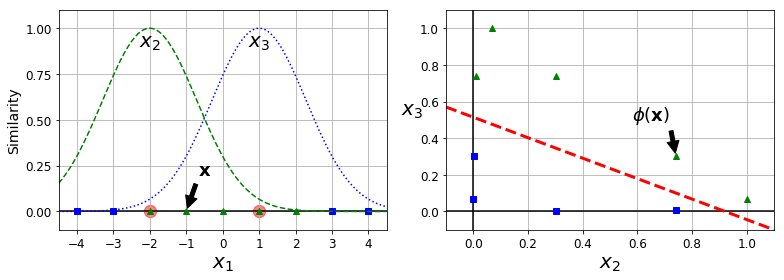

In [19]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

save_fig("kernel_method_plot")

As we can see from above, for instance, when $x_1 = -1$: it is located at a distance of 1 from the first landmark ($x_1 = -2$) and 2 from the second landmark ($x_1 = 1$). Therefore, it's new features are $x_2 = \exp(-0.3 \times 1^2) \approx 0.74 $ and $x_3 = \exp(-0.3 \times 2^2) \approx 0.30$. The plot on the right shows the transformed dataset. This is now linearly separable.

The simplest approach for selecting landmarks is to create a landmark at the location of each and every instance in the dataset. This creates many dimensions and thus increases the chances that the transformed training set will be linearly separable. The downside is that a training set with $m$ instances and $n$ features gets transformed into a training set with $m$ instances and $m$ features (assuming we drop the original features). If our training set is very large, we'll end up with an equally large number of features.

### Gaussian RBF Kernel

Just like polynomial features method, the similarity features method can be useful with any Machine Learning algorithm, but it may be computationally expensive to compute all the additional features, especially on large training sets. The kernel trick makes it possible to obtain a similar results as if we had added many similarity features, without actually having to add them.

The Gaussian RBF kernel can be implemented using `SVC` class:

In [20]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'rbf', gamma = 5, C = 0.001)),
])

rbf_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

For hyperparamter explanations, see illustrations below:

Saving figure moons_rbf_svc_plot


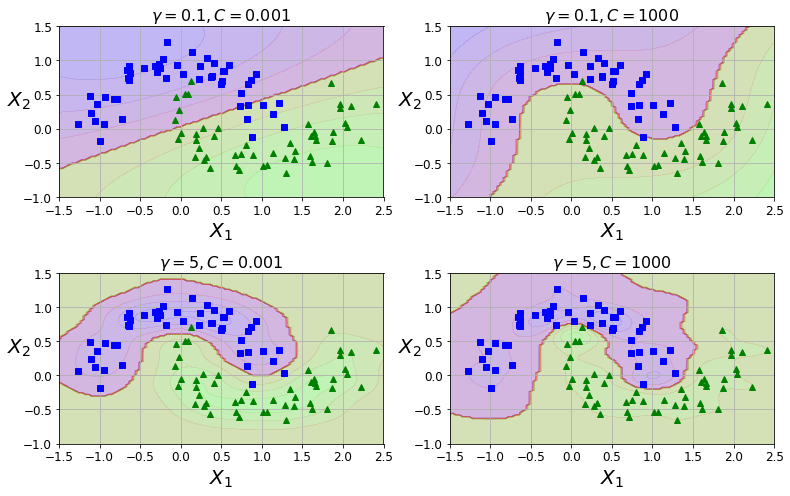

In [21]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

save_fig("moons_rbf_svc_plot")

Increasing `gamma` ($\gamma$) makes the bell-shaped curve narrower, and as a result each instance's range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances. Conversely, a small `gamma` ($\gamma$) value makes the bell-shaped curve wider, so instances have a larger range of influence, and the decision boundary ends up smoother. <br>
__In summary, $\gamma$ acts like a regularization hyperparameter: if your model is overfitting, you should reduce it, and if it is underfitting, you should increase it (similar to the `C` hyperparameter)__.

__Note__: <br>

Regarding choosing kernels, we should always try the linear kernel first (remember that `LinearSVC` is much faster than `SVC(kernel = 'linear')`), especially if the training set is not too large, you should try the Gaussian RBF kernel as well; it works well in most cases. Then if you have spare time and computing power, you can also experiment with a few other kernels using cross-validation and grid search, especially if there are kernels specialized for your training set's data structure.

### Computational Complexity

See summary below:

|Class|Time Complexity| Out-of-core support| Scaling Required| Kernel Trick|
|-----|-----|-----|-----|-----|
|`LinearSVC`| $O(m\times n)$ | No | Yes | No|
|`SGDClassifier`| $O(m \times n)$ | Yes | Yes |No|
|`SVC`| $O(m^2 \times n)$ to $O(m^3 \times n )$| No | Yes | Yes|

# SVM Regression